7.499999999861845e-10 1.842068074402605e-11


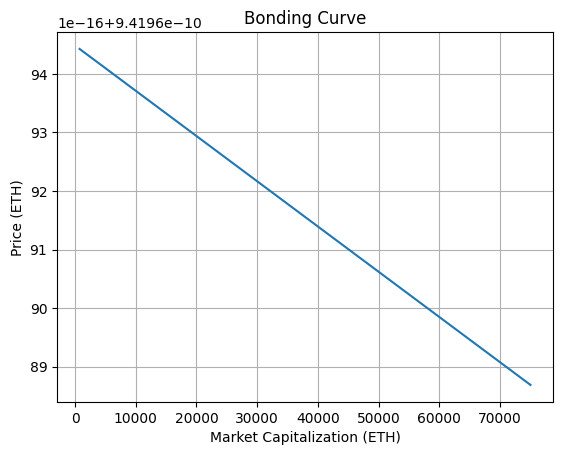

ETH amount required for graduation of token: 99.99732760780483
Number of tokens sold up to 75000 USD market cap: 106157751558.5671
Remaining supply of tokens: 893842248441.4329
Initial Price: 9.419694486274375e-10
Final Price from MC: 1.209486354319934e-10
Avg price of token sold: 9.41969155711031e-10


In [60]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import minimize, root

# Given values
initial_MC = 750
initial_price = 7.5e-10
graduation_MC = 75000
graduation_price = 7.5e-8
accumulated_eth_required = 100
total_supply = 1e12
initial_supply=1
max_supply_sold=0.25*total_supply

# Define the system of equations for initial price and graduation price constraints
def equations(vars):
    a, b = vars
    eq1 = a * np.exp(b * initial_supply) - initial_price
    eq2 = a * np.exp(b * max_supply_sold) - graduation_price
    return [eq1, eq2]

# Initial guess
initial_guess = [1e-10, 1e-10]

# Solve the initial system of equations for a and b
solution = root(equations, initial_guess)

# Extract the initial solution
a_initial, b_initial = solution.x

print(a_initial,b_initial)

def total_accumulated_eth(a, b, initial_supply, max_supply_sold):
    integral, _ = quad(lambda x: a * np.exp(b * x), initial_supply, max_supply_sold)
    return integral

# Define the cost function for adjusting a and b to meet accumulated ETH constraint
def cost_function(vars):
    a, b = vars
    integral, _ = quad(lambda x: a * np.exp(b * x), initial_supply, max_supply_sold)
    return (integral - accumulated_eth_required)**2



# Optimize a and b to meet accumulated ETH constraint
optimized_solution = minimize(cost_function, [a_initial, b_initial], method='Nelder-Mead')

# Extract the optimized solution
a_optimized, b_optimized = optimized_solution.x
#a_optimized=7.5e10
#b_optimized=7.16e-10

def price_function(x):
    return a_optimized * math.exp(b_optimized * x)

# Verify the final accumulated ETH
accumulated_eth_final = total_accumulated_eth(a_optimized, b_optimized, initial_supply, max_supply_sold)

# Plot the bonding curve
MC_values = np.linspace(initial_MC, graduation_MC, 1000)
price_values = a_optimized * np.exp(b_optimized * MC_values)

plt.plot(MC_values, price_values)
plt.xlabel('Market Capitalization (ETH)')
plt.ylabel('Price (ETH)')
plt.title('Bonding Curve')
plt.grid(True)
plt.show()


tokens_sold = accumulated_eth_final / (a_optimized * np.exp(b_optimized * (initial_MC + graduation_MC) / 2))  # Midpoint approximation for average price

# Calculate the remaining supply of tokens
remaining_supply = total_supply - tokens_sold

# Print the values

print(f"ETH amount required for graduation of token: {accumulated_eth_final}")
print(f"Number of tokens sold up to {graduation_MC} USD market cap: {tokens_sold}")
print(f"Remaining supply of tokens: {remaining_supply}")
print(f"Initial Price: {price_function(initial_supply)}")
print(f"Final Price from MC: {price_function(max_supply_sold)}")
print(f"Avg price of token sold: {accumulated_eth_final/ tokens_sold}")


In [46]:
price_function(75000)

0.0062648983926648204

C:\Users\idree\AppData\Local\Temp\ipykernel_30476\2448915196.py:21: RuntimeWarning: overflow encountered in exp
  integral, _ = quad(lambda x: a * np.exp(b * x), initial_supply, max_supply_sold)


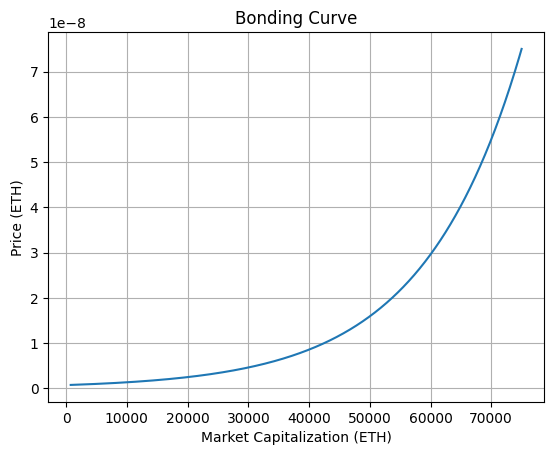

ETH amount required for graduation of token: inf
Number of tokens sold up to 75000 ETH market cap: inf
Remaining supply of tokens: -inf
Initial Price: 9.4196944285205e-10
Final Price from MC: 9.419688686048145e-10
Avg price of token sold: nan


In [58]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve

# Given values
initial_MC = 750
initial_price = 7.5e-10
graduation_MC = 75000
graduation_price = 7.5e-8
accumulated_eth_required = 100
total_supply = 1e12

# Solve for b
b = np.log(100) / (graduation_MC - initial_MC)

# Solve for a
a = initial_price / np.exp(b * initial_MC)

# Verify the accumulated ETH
def total_accumulated_eth(a, b, initial_supply, max_supply_sold):
    integral, _ = quad(lambda x: a * np.exp(b * x), initial_supply, max_supply_sold)
    return integral

# Calculate initial accumulated ETH
accumulated_eth_initial = total_accumulated_eth(a, b, initial_supply, max_supply_sold)

# Adjust a to meet accumulated ETH requirement if necessary
if accumulated_eth_initial < accumulated_eth_required:
    adjustment_factor = accumulated_eth_required / accumulated_eth_initial
    a *= adjustment_factor

# Verify the final accumulated ETH
accumulated_eth_final = total_accumulated_eth(a, b, initial_supply, max_supply_sold)

# Plot the bonding curve
MC_values = np.linspace(initial_MC, graduation_MC, 1000)
price_values = a * np.exp(b * MC_values)

plt.plot(MC_values, price_values)
plt.xlabel('Market Capitalization (ETH)')
plt.ylabel('Price (ETH)')
plt.title('Bonding Curve')
plt.grid(True)
plt.show()

# Calculate the required values
total_usd_invested = accumulated_eth_final * initial_price
total_usdt = 100
tokens_sold = accumulated_eth_final / initial_price
remaining_supply = total_supply - tokens_sold

print(f"ETH amount required for graduation of token: {accumulated_eth_final}")
print(f"Number of tokens sold up to {graduation_MC} ETH market cap: {tokens_sold}")
print(f"Remaining supply of tokens: {remaining_supply}")
print(f"Initial Price: {price_function(initial_MC)}")
print(f"Final Price from MC: {price_function(graduation_MC)}")
print(f"Avg price of token sold: {accumulated_eth_final/ tokens_sold}")


In [43]:
price_function(10000)

0.00011119167715300161

In [49]:
import math

def calculate_tokens_purchased(a, b, eth_amount, initial_market_cap):
    
    # Calculate the final market cap after the trade
    final_market_cap_exp = (eth_amount * b / a) + math.exp(b * initial_market_cap)
    final_market_cap = math.log(final_market_cap_exp) / b
    
    # Calculate the number of tokens purchased
    tokens_purchased = final_market_cap - initial_market_cap
    
    return tokens_purchased,final_market_cap

def calculate_eth_received(a, b, tokens_sold, initial_market_cap):
    # Calculate the final market cap after the sale
    final_market_cap = initial_market_cap - tokens_sold
    
    # Calculate the USD value received from selling the tokens
    eth_received = (a / b) * (math.exp(b * initial_market_cap) - math.exp(b * final_market_cap))
    
    # Convert the USD value to ETH
    
    return eth_received,final_market_cap

# Parameters
a = a_optimized  # Initial price parameter
b = b_optimized  # Aggressiveness parameter
eth_amount = 100  # Amount of ETH used for the trade
initial_market_cap = 750  # Initial market cap before the trade
 # Number of tokens sold

# Calculate tokens purchased
tokens_purchased,final_market_cap = calculate_tokens_purchased(a, b, eth_amount, initial_market_cap)
print(f"Tokens purchased for {eth_amount} ETH: {tokens_purchased}")
print(f"Avg ETH Buy Price per token: {tokens_purchased/eth_amount}")
print(f"New MC after this purchase: {final_market_cap}")

# Calculate ETH received for selling tokens
tokens_sold = tokens_purchased
initial_market_cap=final_market_cap
eth_received,final_market_cap = calculate_eth_received(a, b, tokens_sold, initial_market_cap)
print(f"ETH received for selling {tokens_sold} tokens: {eth_received}")
print(f"Avg ETH Sell Price per token: {tokens_sold/eth_received}")
print(f"New MC after this Sell: {final_market_cap}")



Tokens purchased for 100 ETH: 74250.13735771835
Avg ETH Buy Price per token: 742.5013735771836
New MC after this purchase: 75000.13735771835
ETH received for selling 74250.13735771835 tokens: 100.00000000000013
Avg ETH Sell Price per token: 742.5013735771826
New MC after this Sell: 750.0


In [50]:
a=6.2e-5
b=7.16e-10


In [ ]:
import numpy as np
from scipy.optimize import fsolve

# Given parameters
initial_price = 7.5e-10  # Initial price in ETH
graduation_price = 7.5e-8  # Graduation price in ETH
total_supply = 1e12  # Total supply of tokens
tokens_to_sell = 0.25 * total_supply  # 25% of total supply
target_eth = 100  # Target ETH to be raised

# Function to calculate the growth rate constant b
def equation(b):
    return (initial_price / b) * (np.exp(b * tokens_to_sell) - 1) - target_eth

# Initial guess for b
initial_guess = 1e-10

# Solve for b
b_solution = fsolve(equation, initial_guess)[0]

# Print the calculated growth rate constant b
print(f"Bonding curve Parameter b (growth rate constant): {b_solution:.12f}")

# Verify the ETH raised with the calculated b
eth_raised_final = (initial_price / b_solution) * (np.exp(b_solution * tokens_to_sell) - 1)
print(f"ETH accumulated by selling 25% of the total supply: {eth_raised_final:.6f} ETH")


In [ ]:
import numpy as np

# Given parameters
a = 7.5e-10  # Initial price in ETH
Pg = 7.5e-8  # Graduation price in ETH
total_supply = 1e12  # Total supply of tokens
tokens_to_sell = 0.25 * total_supply  # Tokens to be sold (25% of total supply)

# Calculate the growth rate constant b
g = tokens_to_sell
b = np.log(Pg / a) / g

# Function to calculate the number of tokens bought for given ETH
def tokens_for_eth(eth_amount, a, b, current_supply):
    return (1 / b) * np.log((eth_amount * b / a) + np.exp(b * current_supply))

# Function to calculate the ETH received for selling tokens
def eth_for_tokens(tokens, a, b, current_supply):
    return (a / b) * (np.exp(b * (tokens + current_supply)) - np.exp(b * current_supply))

# Example usage
current_supply = 0

# First user buys 1 ETH worth of tokens
eth_amount1 = 1
tokens_bought1 = tokens_for_eth(eth_amount1, a, b, current_supply)
new_supply1 = current_supply + tokens_bought1

# Second user buys 2 ETH worth of tokens
eth_amount2 = 2
tokens_bought2 = tokens_for_eth(eth_amount2, a, b, new_supply1) - new_supply1
new_supply2 = new_supply1 + tokens_bought2

# User sells some tokens
tokens_sold = tokens_bought1
eth_received = eth_for_tokens(tokens_sold, a, b, new_supply2)

print(f"Growth rate constant b: {b:.12f}")
print(f"Tokens bought for 1 ETH: {tokens_bought1:.2f} tokens")
print(f"Supply after first purchase: {new_supply1:.2f} tokens")
print(f"Tokens bought for 2 ETH: {tokens_bought2:.2f} tokens")
print(f"Supply after second purchase: {new_supply2:.2f} tokens")
print(f"ETH received for selling {tokens_sold:.2f} tokens: {eth_received:.2f} ETH")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
initial_mc=750
graduation_mc=75000
total_supply = 1e12  # Total supply of tokens
target_eth = 100  # Target ETH to be raised
max_supply_sold=0.25


a = initial_mc/total_supply  # Initial price in ETH
Pg = graduation_mc/total_supply  # Graduation price in ETH
tokens_to_sell =max_supply_sold  * total_supply  # Tokens to be sold (25% of total supply)

# Calculate the growth rate constant b
g = tokens_to_sell
b = np.log(Pg / a) / g

# Function to calculate the price P(n)
def price(n, a, b):
    return a * np.exp(b * n)

# Function to calculate the ETH raised
def eth_raised(n, a, b):
    return (a / b) * (np.exp(b * n) - 1)

# Function to calculate the number of tokens for given ETH
def tokens_for_eth(eth_amount, a, b):
    return np.log((eth_amount * b / a) + 1) / b

# Function to calculate the ETH for given tokens
def eth_for_tokens(tokens, a, b):
    return (a / b) * (np.exp(b * tokens) - 1)

# Example: Calculate tokens for buying with 1 ETH
eth_amount = 100
tokens_bought = tokens_for_eth(eth_amount, a, b)

# Example: Calculate ETH for selling tokens_bought tokens
eth_received = eth_for_tokens(tokens_bought, a, b)

# Generate data for plotting
supply = np.linspace(0, tokens_to_sell, 1000)
prices = price(supply, a, b)
eth_raised_values = eth_raised(supply, a, b)

# Plot the bonding curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(supply, prices, label='Price (ETH)')
plt.xlabel('Supply of Tokens')
plt.ylabel('Price (ETH)')
plt.title('Bonding Curve: Price vs. Supply')
plt.legend()


plt.tight_layout()
plt.show()

# Print the calculated values
print(f"Growth rate constant b: {b:.12f}")
print(f"Tokens to sell to raise {target_eth} ETH: {tokens_for_eth(target_eth, a, b):.2f} tokens")
print(f"Tokens bought for 1 ETH: {tokens_bought:.2f} tokens")
print(f"ETH received for selling {tokens_bought:.2f} tokens: {eth_received:.2f} ETH")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
initial_mc=750
graduation_mc=75000
total_supply = 1e12  # Total supply of tokens
target_eth = 100  # Target ETH to be raised
max_supply_sold=0.5


initial_price = initial_mc/total_supply  # Initial price in ETH
graduation_price = graduation_mc/total_supply  # Graduation price in ETH
tokens_to_sell = max_supply_sold  * total_supply  # Tokens to be sold (25% of total supply)

# Calculate the growth rate constant b
g = tokens_to_sell
a = initial_price
b = np.log(graduation_price / a) / g

# Function to calculate the price P(n)
def price(n, a, b):
    return a * np.exp(b * n)

# Function to calculate the ETH raised
def eth_raised(n, a, b):
    return (a / b) * (np.exp(b * n) - 1)

# Calculate the number of tokens to sell to raise the target ETH
tokens_for_target_eth = np.log((target_eth * b / a) + 1) / b

# Generate data for plotting
supply = np.linspace(0, tokens_to_sell, 10000)
prices = price(supply, a, b)
eth_raised_values = eth_raised(supply, a, b)
market_cap = total_supply * prices

# Plot the bonding curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(supply, prices, label='Price (ETH)')
plt.xlabel('Supply of Tokens')
plt.ylabel('Price (ETH)')
plt.title('Bonding Curve: Price vs. Supply')
plt.legend()

# Plot the market capitalization vs. price
plt.subplot(1, 2, 2)
plt.plot(market_cap, prices, label='Price (ETH)')
plt.xlabel('Market Capitalization (ETH)')
plt.ylabel('Price (ETH)')
plt.title('Bonding Curve: Market Cap vs. Price')
plt.legend()

plt.tight_layout()
plt.show()


# Print the calculated values
print(f"Bonding curve Parameter a: {a:.12f}")
print(f"Bonding curve Parameter b: {b:.12f}")
print(f"%age of total supply of tokens sold to get liquidity of {target_eth} ETH: {(tokens_for_target_eth/total_supply)*100} %")
print(f"Token Sold to achieve liquidty target of {target_eth} ETH: {tokens_for_target_eth:.2f} tokens")
print(f"Remaining supply of tokens: {(total_supply-tokens_for_target_eth)}")
print(f"Avg price of token sold: {target_eth/tokens_for_target_eth}")